In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

DATA_PATH = './Gesture Image Data/'
metadata = {cls:os.listdir(os.path.join(DATA_PATH, cls)) for cls in os.listdir(DATA_PATH)}
get_img = lambda cls, name: os.path.join(DATA_PATH, cls, name)

In [64]:
def random_img(cls=None):
    if cls == None:
        cls = random.choice(list(metadata.keys()))
    name = random.choice(metadata[cls])
    img = cv2.cvtColor(cv2.imread(get_img(cls, name)), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64, 64))
    return img

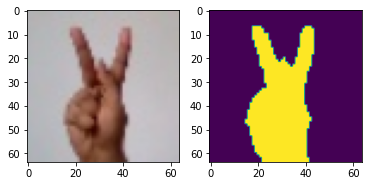

In [173]:
def hand_mask(img, fill=True):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 61, 2)
    if fill:
        contour, hier = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contour:
            cv2.drawContours(thresh, [cnt], 0, 255, -1)
    return (thresh > 126)[:, :, None]

f, ax = plt.subplots(1, 2)
img = random_img('K')
ax[0].imshow(img)
ax[1].imshow(hand_mask(img, True))

In [175]:
def random_bg(path):
    name = random.choice(os.listdir(path))
    img = cv2.imread(os.path.join(path, name))
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

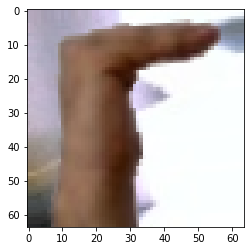

In [200]:
img = random_img()
bg = random_bg('./bg_train/')
mask = hand_mask(img, True)
res = img * mask + bg * (1-mask)
#plt.imshow(np.array(res).astype(np.uint8))
plt.imshow(aug_rotate(np.array(res).astype(np.uint8), 30))

In [186]:
def aug_rotate(img, max_degs):
    degs = 2*max_degs*random.random() - max_degs
    pad_h, pad_w = img.shape[0]//3, img.shape[1]//3
    pad = cv2.copyMakeBorder(img, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)
    center = tuple(np.array(pad.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(center, degs, 1.0)
    rotated = cv2.warpAffine(pad, rot_mat, pad.shape[1::-1], flags=cv2.INTER_LINEAR)
    crop = rotated[pad_h:-pad_h, pad_w:-pad_w]
    return crop

def aug_pca_color(img):
    #these are empirical values
    pc = np.array([-0.48228501, -0.58917701, -0.6482836])
    evr = 0.98
    alpha = lambda : np.random.normal()/5
    img = img + alpha()* 255 * pc * evr
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

In [235]:
#50 images per class -> 1000 augmented images
#EVERY 30th IS USED TO GENERATE TRAINING DATA
write_to = './gesture_train/'
no_fill_cls = {'0', 'O'}
for cls in metadata.keys():
    names = sorted(os.listdir(os.path.join(DATA_PATH, cls)))
    print(cls)
    if not cls in os.listdir(write_to):
        os.mkdir(os.path.join(write_to, cls))
    for i in range(0, len(names), 30):
        img = cv2.imread(os.path.join(DATA_PATH, cls, names[i]))
        img = cv2.cvtColor(cv2.resize(img, (64, 64)), cv2.COLOR_BGR2RGB)
        mask = hand_mask(img, not cls in no_fill_cls)
        for j in range(20):        
            bg = random_bg('./bg_train/')
            bg = cv2.resize(bg, (64, 64))
            aug = np.array(img * mask + bg * (1-mask)).astype(np.uint8)
            aug = aug_rotate(aug, 35)
            aug = aug_pca_color(aug)
            name = '{0}_{1}.jpg'.format(i//30, j)
            cv2.imwrite(os.path.join(write_to, cls, name), 
                        cv2.cvtColor(aug, cv2.COLOR_RGB2BGR))

0
1
2
3
4
5
6
7
8
9
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
_


In [236]:
write_to = './gesture_test/'
no_fill_cls = {'0', 'O'}
for cls in metadata.keys():
    names = sorted(os.listdir(os.path.join(DATA_PATH, cls)))
    print(cls)
    if not cls in os.listdir(write_to):
        os.mkdir(os.path.join(write_to, cls))
    for i in range(1, len(names), 100):
        img = cv2.imread(os.path.join(DATA_PATH, cls, names[i]))
        img = cv2.cvtColor(cv2.resize(img, (64, 64)), cv2.COLOR_BGR2RGB)
        mask = hand_mask(img, not cls in no_fill_cls)
        for j in range(10):        
            bg = random_bg('./bg_test/')
            bg = cv2.resize(bg, (64, 64))
            aug = np.array(img * mask + bg * (1-mask)).astype(np.uint8)
            aug = aug_rotate(aug, 35)
            aug = aug_pca_color(aug)
            name = '{0}_{1}.jpg'.format(i//30, j)
            cv2.imwrite(os.path.join(write_to, cls, name), 
                        cv2.cvtColor(aug, cv2.COLOR_RGB2BGR))

0
1
2
3
4
5
6
7
8
9
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
_
